In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df1 = pd.read_pickle('namus_html1.pkl')
df2 = pd.read_pickle('namus_html2.pkl')

In [4]:
dfs = [df1, df2]
namus = pd.concat(dfs)
print(namus.shape)

(10529, 72)


In [5]:
print(namus.sex.value_counts())
print(namus.sex.unique())
print(namus.race.value_counts())
print(namus.case_status.value_counts())

Male      7815
Female    2194
Unsure     518
             2
Name: sex, dtype: int64
['Male' 'Female' 'Unsure' '']
White                     5357
Unsure                    2001
Black/African American    1838
Other                     1006
Asian                      216
Native American             89
                            22
Name: race, dtype: int64
Unidentified           10527
Unidentified Living        2
Name: case_status, dtype: int64


**Prepare target variable: `'CASE_RATING'`**

In [6]:
namus.case_rating.unique()

array(['Medium - High', 'High', 'Medium', 'Extremely Low', 'Low',
       'Low - Medium'], dtype=object)

In [7]:
namus['rating'] = namus.case_rating.map({'Extremely Low':0, 'Low':1, 'Low - Medium': 2,'Medium':3, 'Medium - High':4,
                                        'High':5, })

In [8]:
namus.rating.unique()

array([4, 5, 3, 0, 1, 2])

In [9]:
namus.groupby('rating').mean()

,all_parts_recovered,amputations,artificial_parts_aids,deformities,finger_toe_nails,foreign_objects,head_not_recovered,images,medical_implants,n-hands_not_recovered,n-limbs_not_recovered,organ_absent,other_distinctive_features,other_medical_information,piercings,prior_surgery,scars_and_marks,skeletal_findings,tattoos,torso_not_recovered
rating,,,,,,,,,,,,,,,,,,,,
0,0.699620,0.005703,0.001901,0.007605,0.009506,0.003802,0.020913,0.077947,0.005703,0.098859,0.115970,0.011407,0.001901,0.017110,0.005703,0.009506,0.163498,0.047529,0.117871,0.060837
1,0.427235,0.002079,0.001040,0.004158,0.000000,0.001040,0.175676,0.219335,0.005198,0.371102,0.380457,0.001040,0.020790,0.038462,0.001040,0.006237,0.015593,0.036383,0.007277,0.305613
2,0.753049,0.009146,0.005335,0.013720,0.010671,0.008384,0.067073,0.628811,0.019055,0.127287,0.116616,0.044207,0.049543,0.053354,0.025152,0.028963,0.291159,0.079268,0.121189,0.054116
3,0.612403,0.010078,0.006718,0.011370,0.014470,0.005426,0.098966,0.797416,0.018088,0.253747,0.256331,0.015504,0.065375,0.069251,0.020155,0.042636,0.149096,0.114987,0.079587,0.174419
4,0.500000,0.006773,0.007362,0.020024,0.011484,0.005595,0.044170,1.328033,0.022968,0.362780,0.340106,0.012367,0.042108,0.047998,0.020907,0.029446,0.122497,0.214075,0.051237,0.199647
5,0.928726,0.004320,0.008639,0.012959,0.030238,0.010799,0.000000,3.157667,0.019438,0.017279,0.006479,0.017279,0.075594,0.041037,0.064795,0.058315,0.347732,0.116631,0.168467,0.000000


##Data Exploration and Feature Re-coding

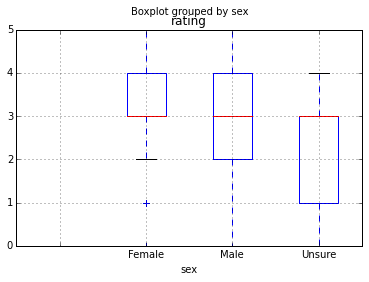

In [10]:
namus.boxplot(column='rating', by='sex')

Looks like **`'sex'`** may be important, but how to code it will take some thought. I'll come back to this one after some more classes...

Since **`'images'`** is neatly coded as a count, and I consider images to be crucial in the identification potential, I wanted to see how the number of images available relates to a rating potential score:

/Users/jenniferstark/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


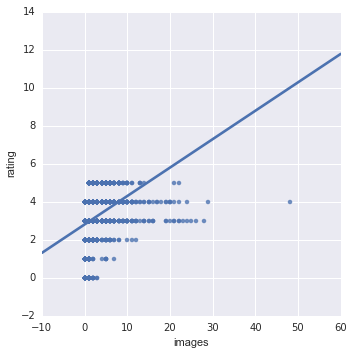

In [11]:
import seaborn as sns
sns.lmplot(x='images', y='rating', data=namus, ci=None)

Looks pretty good: more images do seem to be associated with a higher rating.

Next comes other forensic essentials: **DNA**, **Fingerprints** and **Dental**:

**`'DNA'`**

In [12]:
namus.dna.unique()

array(['Sample submitted - Tests complete',
       'Samples submitted - Tests not complete',
       'Complete - Insufficient DNA for profiling',
       'No DNA information is currently available',
       'Sample is currently not available',
       'Sample available - Not yet submitted'], dtype=object)

In [695]:
namus.groupby(namus.rating).dna.value_counts()

rating  dna                                      
0       No DNA information is currently available     317
        Sample submitted - Tests complete             118
        Sample is currently not available              56
        Complete - Insufficient DNA for profiling      21
        Samples submitted - Tests not complete          8
        Sample available - Not yet submitted            6
1       Sample is currently not available             530
        Sample available - Not yet submitted          191
        Samples submitted - Tests not complete        108
        Complete - Insufficient DNA for profiling      85
        No DNA information is currently available      48
2       Sample is currently not available            1015
        Sample available - Not yet submitted          139
        Samples submitted - Tests not complete         82
        No DNA information is currently available      44
        Complete - Insufficient DNA for profiling      31
        Sample submitt

**DNA** was recoded to `'1'` for `'available`' and `'0'` for `'not available'`

In [13]:
namus['_dna'] = namus.dna.map({'Sample submitted - Tests complete':1,
                              'Samples submitted - Tests not complete':1,
                              'Complete - Insufficient DNA for profiling':0,
                              'No DNA information is currently available':0,
                              'Sample is currently not available':0,
                              'Sample available - Not yet submitted':1})

/Users/jenniferstark/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


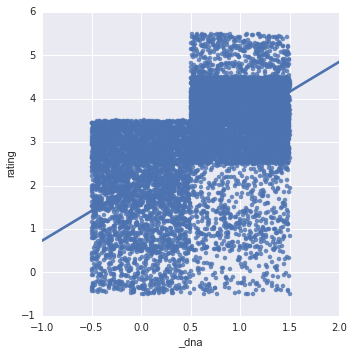

In [14]:
sns.lmplot(x='_dna', y='rating', data=namus, ci=None, x_jitter=0.5, y_jitter=0.5)   #TONS of jitter hahaha

**`'FINGERPRINTS'`**

In [15]:
namus.fingerprints.unique()

array(['Fingerprint information is currently not available',
       'Fingerprint information is available and entered',
       'Fingerprint information is available elsewhere',
       'No fingerprint information is currently available'], dtype=object)

**Fingerprints** were recoded to `'1'` for `'available'` and `'0'` for `'not available'`

In [16]:
namus['_fingerprints'] = namus.fingerprints.map({'Fingerprint information is currently not available':0,
                                                'Fingerprint information is available and entered':1,
                                                'Fingerprint information is available elsewhere':1,
                                                'No fingerprint information is currently available':0})

/Users/jenniferstark/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


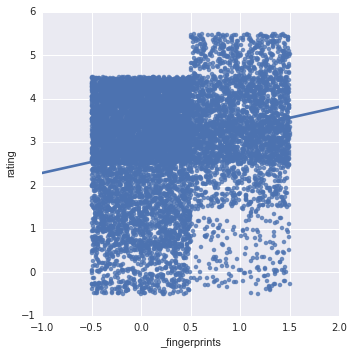

In [17]:
sns.lmplot(x='_fingerprints', y='rating', data=namus, ci=None, x_jitter=0.5, y_jitter=0.5)   #TONS of jitter hahaha

**`'DENTAL'`**

In [18]:
namus.dental.unique()

array(['Dental information / charting is available and entered',
       'Dental information / charting is currently not available',
       'Dental information / charting is available and will be entered later',
       'No dental information is currently available.'], dtype=object)

**Dental** was recoded to `'1'` for `'available'` and `'0'` for `'not available'`

In [19]:
namus['_dental'] = namus.dental.map({'Dental information / charting is available and entered':1,
                                   'Dental information / charting is available and will be entered later':1,
                                   'Dental information / charting is currently not available':0,
                                   'No dental information is currently available.':0})

/Users/jenniferstark/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


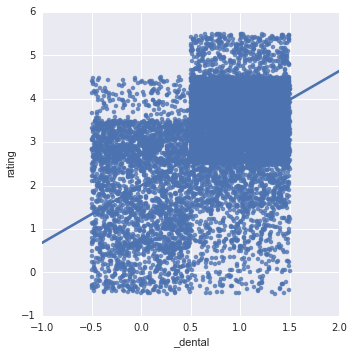

In [20]:
sns.lmplot(x='_dental', y='rating', data=namus, ci=None, x_jitter=0.5, y_jitter=0.5)   #TONS of jitter hahaha

* **Interim conclusion: Having `'DNA'`, `'Dental'` and `'Fingerprints'` from the UP appear to be associated with higher ID Potential. These should be in an initial model, together with `'Images'`**

**`'RECOGNIZABLE_FACE'`** could be safely assumed to be essential to successfully identifiying an UP. 

In [21]:
namus.recognizable_face.unique()

array(['Not recognizable - Partial skeletal parts only',
       'Not recognizable - Decomposing/putrefaction', 'Recognizable face',
       'Not recognizable - Near complete or complete skeleton',
       'Not recognizable - Mummified',
       'Not recognizable - Partial remains with soft tissues',
       'Not recognizable - Traumatic injuries',
       'Not recognizable - Charred/burned', '',
       'Not recognizable - Insect/animal activity'], dtype=object)

**`'recognizable_face'`** was recoded to `'1'` for `'recognizable'` and `'0'` for `'not recognizable'`

In [546]:
namus['_face'] = namus.recognizable_face.map({'Not recognizable - Partial skeletal parts only' : 0,
                                              'Not recognizable - Decomposing/putrefaction': 0,
                                              'Not recognizable - Near complete or complete skeleton':0,
                                              'Not recognizable - Mummified':0,
                                              'Not recognizable - Partial remains with soft tissues':0,
                                              'Not recognizable - Traumatic injuries':0,
                                              'Not recognizable - Charred/burned':0,
                                              'Not recognizable - Insect/animal activity':0,
                                              '':0,
                                             'Recognizable face':1})

In [696]:
namus._face.unique()

array([0, 1])

/Users/jenniferstark/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


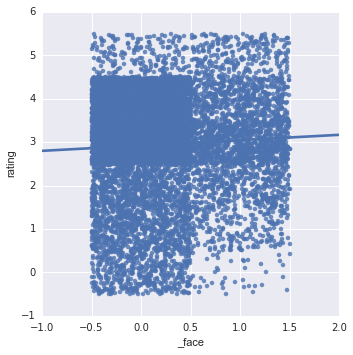

In [26]:
sns.lmplot(x='_face', y='rating', data=namus, ci=None, x_jitter=0.5, y_jitter=0.5)   #TONS of jitter hahaha

Surprisingly to me, **`'_face'`** does not appear to have a strong relationship with **`'rating'`**

**`'LEFT_EYE_COLOR'`** & **`'RIGHT_EYE_COLOR'`**

My assumptions here are that identifying natural eye color would contribute to the identifiability of an UP.

In [27]:
namus.left_eye_color.value_counts()

Unknown or Missing    4701
Brown                 2696
                      2557
Blue                   297
Hazel                  149
Gray                    67
Green                   33
Black                   26
Pink                     3
Name: left_eye_color, dtype: int64

In [28]:
namus[namus.left_eye_color == 'Pink'].eye_description

1441                  Pink
5450    eyes not recovered
2000                      
Name: eye_description, dtype: object

Because some of these colors are unnatural (like **`'Pink'`**), I decided to code colors as `'1'` for '`Natural - present'` and `'0'` for `'Unnatural - absent'`. `'Unknown or Missing'` and `''` were also recoded to `'0'`.

In [29]:
namus[namus.left_eye_color == 'Pink'].right_eye_color

1441                  Pink
5450    Unknown or Missing
2000    Unknown or Missing
Name: right_eye_color, dtype: object

In [30]:
namus['l_eye'] = namus.left_eye_color.map({'': 0,
                                           'Unknown or Missing': 0,
                                           'Blue': 1,
                                           'Brown':1,
                                           'Hazel':1,
                                           'Gray':1,
                                           'Green':1,
                                           'Black':1,
                                           'Pink':0})

In [31]:
namus.right_eye_color.value_counts()

Unknown or Missing    4679
Brown                 2696
                      2578
Blue                   293
Hazel                  150
Gray                    65
Green                   34
Black                   27
Pink                     5
Maroon                   2
Name: right_eye_color, dtype: int64

In [32]:
namus[namus.right_eye_color == 'Pink'].eye_description

1441       Pink
3382    Unknown
5950           
6451    Unknown
2113           
Name: eye_description, dtype: object

**`'Maroon'`** seems to be an unusual color. To determine if it could result from a natural rich brown color, I checked the eye description and the color of the left eye. 

In [33]:
namus[namus.right_eye_color == 'Maroon'].eye_description

5301    
6934    
Name: eye_description, dtype: object

In [34]:
namus[namus.right_eye_color == 'Maroon'].left_eye_color

5301    Brown
6934    Brown
Name: left_eye_color, dtype: object

Being that there is no description, and the left eye is decribed as brown, I feel it likely that **`'Maroon'`** is not natural, and therefore will be coded `'0'`.

In [35]:
namus[namus.right_eye_color == 'Pink'].left_eye_color

1441                  Pink
3382    Unknown or Missing
5950    Unknown or Missing
6451    Unknown or Missing
2113    Unknown or Missing
Name: left_eye_color, dtype: object

In [36]:
namus['r_eye'] = namus.right_eye_color.map({'': 0,
                                           'Unknown or Missing': 0,
                                           'Blue': 1,
                                           'Brown':1,
                                           'Hazel':1,
                                           'Gray':1,
                                           'Green':1,
                                           'Black':1,
                                           'Pink':0,
                                           'Maroon':0})

/Users/jenniferstark/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


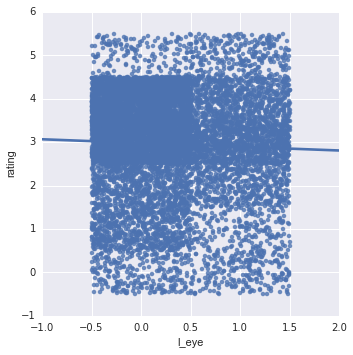

In [37]:
sns.lmplot(x='l_eye', y='rating', data=namus, ci=None, x_jitter=0.5, y_jitter=0.5)

/Users/jenniferstark/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


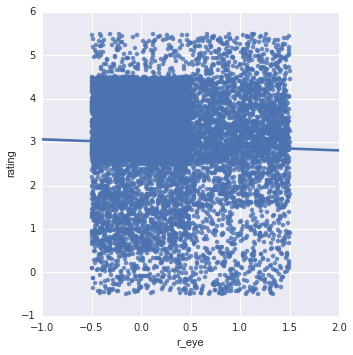

In [38]:
sns.lmplot(x='r_eye', y='rating', data=namus, ci=None, x_jitter=0.5, y_jitter=0.5)

* **Interesting that availability of eye color appears to be negatively associated with ID potential (rating). A model will be testing with and without these features...**

**`'AGE'`**

**`'Estimated_age'`** does not appear to be very useful. Very vague...

In [39]:
namus.est_age.unique()

array(['Adult - Pre 60', 'Adult - Pre 40', 'Adult - Pre 20',
       'Adult - Pre 70', 'Adult - Pre 80', 'Adult', 'Adult - Pre 50',
       'Adult - Pre 30', 'Adolescent', 'Cannot Determine',
       'Adult - Pre 90', 'Infant', 'Fetus', '', 'PreAdolescent',
       'Late Teen/Young Adult'], dtype=object)

All the observations for **`'min_age'`** have **'`years'`** which is great as I wont need to recode to months or days. However, it _is_ apparent that some observations do not have a value at all - only **`'years'`**. Will have to `'fillna'`. Same for **`'max_age'`**

In [40]:
namus.min_age.unique()

array(['45 years', '20 years', '14 years', '35 years', '30 years',
       '50 years', '16 years', '55 years', '25 years', '40 years',
       '19 years', '24 years', '18 years', '12 years', '23 years',
       '17 years', '56 years', '28 years', '37 years', '26 years',
       '60 years', '70 years', '15 years', '22 years', '38 years',
       '34 years', '0 years', '33 years', '21 years', '46 years',
       '36 years', '65 years', '27 years', '32 years', '29 years',
       '10 years', '41 years', '54 years', '11 years', '67 years',
       '66 years', '49 years', '59 years', '44 years', '48 years',
       '31 years', '68 years', '51 years', '47 years', '58 years',
       '39 years', '73 years', '13 years', '42 years', '64 years',
       '43 years', '5 years', '2 years', '1 years', 'years', '53 years',
       '3 years', '63 years', '62 years', '71 years', '52 years',
       '8 years', '75 years', '61 years', '57 years', '4 years',
       '74 years', '80 years', '9 years', '6 years', '69 yea

In [41]:
namus.max_age.unique()

array(['60 years', '40 years', '25 years', '65 years', '50 years',
       '80 years', '99 years', '35 years', '45 years', '55 years',
       '34 years', '30 years', '16 years', '57 years', '70 years',
       '22 years', '36 years', '59 years', '78 years', '85 years',
       '75 years', '18 years', '39 years', '20 years', '28 years',
       '95 years', '32 years', '17 years', '1 years', '24 years',
       '0 years', '43 years', '29 years', '19 years', '46 years',
       '21 years', '90 years', '48 years', '42 years', '66 years',
       '64 years', '31 years', '38 years', '26 years', '27 years',
       '100 years', '68 years', '49 years', '71 years', '5 years',
       '77 years', '23 years', '69 years', '33 years', '37 years',
       '52 years', '44 years', '56 years', '58 years', '79 years',
       '51 years', '47 years', '73 years', '41 years', '76 years',
       '53 years', '61 years', '63 years', '62 years', '11 years',
       '4 years', '3 years', '54 years', 'years', '87 years', '6

Once these is cleaned up to a continuous variable (should be easy), I'll check the relationship between min- and max-age with ID potential (`'rating'`). If information accuracy is important in determining the IP potential, then the certainty of age estimation - i.e. the _difference_ between min and max age might be more important than the age itself. Therefore, **`'age_range'`** might be a good engineered feature. 

In [42]:
namus['_min_age'] = namus['min_age'].map(lambda x: x.rstrip('years'))
namus['_max_age'] = namus['max_age'].map(lambda x: x.rstrip('years'))

In [43]:
import numpy as np

namus._min_age.replace('', np.nan, inplace=True)
namus._max_age.replace('', np.nan, inplace=True)
namus['_min_age'] = namus._min_age.astype('float')
namus['_max_age'] = namus._max_age.astype('float')

In [44]:
namus._max_age.unique()

array([  60.,   40.,   25.,   65.,   50.,   80.,   99.,   35.,   45.,
         55.,   34.,   30.,   16.,   57.,   70.,   22.,   36.,   59.,
         78.,   85.,   75.,   18.,   39.,   20.,   28.,   95.,   32.,
         17.,    1.,   24.,    0.,   43.,   29.,   19.,   46.,   21.,
         90.,   48.,   42.,   66.,   64.,   31.,   38.,   26.,   27.,
        100.,   68.,   49.,   71.,    5.,   77.,   23.,   69.,   33.,
         37.,   52.,   44.,   56.,   58.,   79.,   51.,   47.,   73.,
         41.,   76.,   53.,   61.,   63.,   62.,   11.,    4.,    3.,
         54.,   nan,   87.,   67.,   72.,   74.,    2.,   15.,   84.,
          8.,   12.,    7.,   14.,   88.,    6.,   89.,   10.,    9.,
         13.,   83.])

/Users/jenniferstark/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


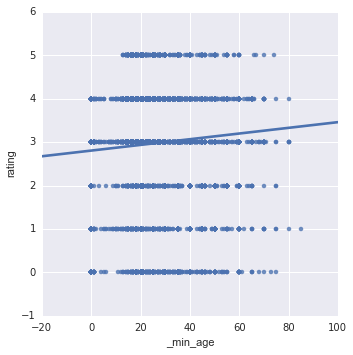

In [45]:
sns.lmplot(x='_min_age', y='rating', data=namus, ci=None)

/Users/jenniferstark/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


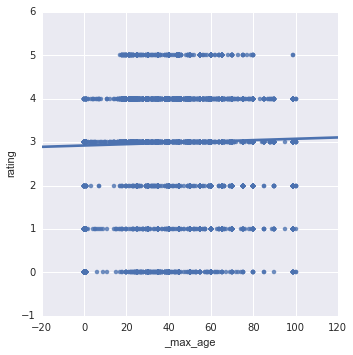

In [46]:
sns.lmplot(x='_max_age', y='rating', data=namus, ci=None)

** *`'_min_age'` and `'_max_age'` both suggest that the older the age, the higher the ID Potential. Odd. But lets try `'age_range'`, since that seems to make more sense considering the idea that information _accuracy_ is what is important**

In [47]:
namus['age_range'] = namus._max_age.subtract(namus._min_age)

**_Somehow_** there are negative numbers in the data! gah!

In [48]:
namus.age_range.unique()

array([ 15.,  20.,  11.,  30.,  83.,  10.,   5.,  21.,   7.,  40.,   4.,
        25.,  34.,   8.,   9.,  45.,  27.,   6.,  32.,  17.,  18.,  81.,
        49.,  14.,   3.,  16.,  59.,  50.,  79.,  22.,   2.,  42.,  35.,
        52.,  12.,  31.,   1.,   0.,  39.,  26.,  46.,  13.,  37.,  56.,
        24.,  19.,  62.,  23.,  41.,  29.,  43.,  36.,  28.,  99.,  nan,
        54.,  60.,  57.,  98.,  47.,  74.,  58.,  44.,  64.,  55.,  -9.,
        77.,  69.,  70., -30.,  51.,  85.,  48.,  33.,  82., -25.,  84.,
        72.,  65.,  75.,  80.,  87.,  90.,  53.,  71.,  88.,  38.])

* **Again, being certain of age does not appear to be strongly related to ID potential. But at least the trend is in an expected direction: a larger range is associated with a lower ID potential rating**

* Remove all negative value and replace with nan.

In [49]:
namus.age_range = np.abs(namus.age_range)
namus.age_range.unique()

array([ 15.,  20.,  11.,  30.,  83.,  10.,   5.,  21.,   7.,  40.,   4.,
        25.,  34.,   8.,   9.,  45.,  27.,   6.,  32.,  17.,  18.,  81.,
        49.,  14.,   3.,  16.,  59.,  50.,  79.,  22.,   2.,  42.,  35.,
        52.,  12.,  31.,   1.,   0.,  39.,  26.,  46.,  13.,  37.,  56.,
        24.,  19.,  62.,  23.,  41.,  29.,  43.,  36.,  28.,  99.,  nan,
        54.,  60.,  57.,  98.,  47.,  74.,  58.,  44.,  64.,  55.,  77.,
        69.,  70.,  51.,  85.,  48.,  33.,  82.,  84.,  72.,  65.,  75.,
        80.,  87.,  90.,  53.,  71.,  88.,  38.])

In [200]:
namus.age_range.replace('nan', 99, inplace=True)
#namus._min_age.replace('', np.nan, inplace=True)
namus.age_range.unique()

array([ 15.,  20.,  11.,  30.,  83.,  10.,   5.,  21.,   7.,  40.,   4.,
        25.,  34.,   8.,   9.,  45.,  27.,   6.,  32.,  17.,  18.,  81.,
        49.,  14.,   3.,  16.,  59.,  50.,  79.,  22.,   2.,  42.,  35.,
        52.,  12.,  31.,   1.,   0.,  39.,  26.,  46.,  13.,  37.,  56.,
        24.,  19.,  62.,  23.,  41.,  29.,  43.,  36.,  28.,  99.,  54.,
        60.,  57.,  98.,  47.,  74.,  58.,  44.,  64.,  55.,  77.,  69.,
        70.,  51.,  85.,  48.,  33.,  82.,  84.,  72.,  65.,  75.,  80.,
        87.,  90.,  53.,  71.,  88.,  38.])

/Users/jenniferstark/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


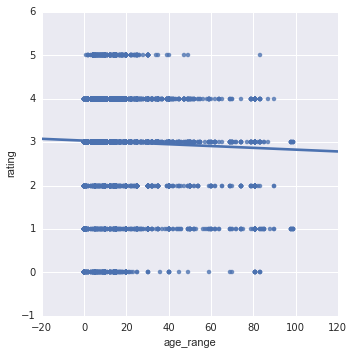

In [50]:
sns.lmplot(x='age_range', y='rating', data=namus, ci=None)

**`'WEIGHT'` & `'HEIGHT'` optionally continuous or categorical variables**

In [51]:
namus.weight.unique()

array([',\n\t\t\t\t\tCannot Estimate', ',\n\t\t\t\t\tEstimated',
       '103,\n\t\t\t\t\tMeasured', '112,\n\t\t\t\t\tMeasured',
       '185,\n\t\t\t\t\tEstimated', '120,\n\t\t\t\t\tMeasured',
       '146,\n\t\t\t\t\tEstimated', '163,\n\t\t\t\t\tEstimated',
       '159,\n\t\t\t\t\tMeasured', '225,\n\t\t\t\t\tEstimated',
       '130,\n\t\t\t\t\tEstimated', '172,\n\t\t\t\t\tMeasured',
       '140,\n\t\t\t\t\tMeasured', '100,\n\t\t\t\t\tMeasured',
       '220,\n\t\t\t\t\tEstimated', '143,\n\t\t\t\t\tMeasured',
       '119,\n\t\t\t\t\tMeasured', ',', '190,\n\t\t\t\t\tEstimated',
       '145,\n\t\t\t\t\tEstimated', '168,\n\t\t\t\t\tMeasured',
       '160,\n\t\t\t\t\tMeasured', '132,\n\t\t\t\t\tMeasured',
       '150,\n\t\t\t\t\tMeasured', '152,\n\t\t\t\t\tMeasured',
       '149,\n\t\t\t\t\tMeasured', '130,\n\t\t\t\t\tMeasured',
       '123,\n\t\t\t\t\tMeasured', '106,\n\t\t\t\t\tMeasured',
       '146,\n\t\t\t\t\tMeasured', '93,\n\t\t\t\t\tMeasured',
       '126,\n\t\t\t\t\tMeasured', '117,\

In [52]:
namus.height.unique()

array(['64,\n\t\t\t\t\tEstimated', '66,\n\t\t\t\t\tEstimated',
       '62,\n\t\t\t\t\tMeasured', '66,\n\t\t\t\t\tMeasured',
       '72,\n\t\t\t\t\tEstimated', '67,\n\t\t\t\t\tMeasured',
       '63,\n\t\t\t\t\tMeasured', '69,\n\t\t\t\t\tMeasured',
       '70,\n\t\t\t\t\tEstimated', '62,\n\t\t\t\t\tEstimated',
       '75,\n\t\t\t\t\tMeasured', '74,\n\t\t\t\t\tEstimated',
       '65,\n\t\t\t\t\tMeasured', '64,\n\t\t\t\t\tMeasured',
       '68,\n\t\t\t\t\tEstimated', '59,\n\t\t\t\t\tMeasured',
       '61,\n\t\t\t\t\tEstimated', '72,\n\t\t\t\t\tMeasured',
       '77,\n\t\t\t\t\tMeasured', '60,\n\t\t\t\t\tEstimated',
       '67,\n\t\t\t\t\tEstimated', '70,\n\t\t\t\t\tMeasured',
       '68,\n\t\t\t\t\tMeasured', '57,\n\t\t\t\t\tCannot Estimate',
       '59,\n\t\t\t\t\tEstimated', '69,\n\t\t\t\t\tEstimated',
       '73,\n\t\t\t\t\tEstimated', '61,\n\t\t\t\t\tMeasured',
       '65,\n\t\t\t\t\tEstimated', '60,\n\t\t\t\t\tMeasured',
       '63,\n\t\t\t\t\tEstimated', '71,\n\t\t\t\t\tMeasured',
  

 1. define function to print
 2. modify funciton to split on ',' comma -> output a list of strings [int bit, string bit]
 3. add part that pulls out first element make it into an integer
 4. new function that splits on ',', and pulls out second part in list, lstrip() and returns 
 5. make namus[newcol]....apply(function1)
 6. make namus[newcol]....apply(function2)

In [53]:
values = []
for c in namus.weight:
    try:
        temp = c.split(',')
        values.append(temp[1].strip('\n\t\t\t\t\t'))
    except:
        values.append('NA')

In [56]:
namus['height_text'] = values

In [57]:
namus.weight_text.unique()

array(['Cannot Estimate', 'Estimated', 'Measured', ''], dtype=object)

In [61]:
def printer(col):
    print(str(col).split(',')[0])

def splitter(col):
    return str(col).split(',')[0]

In [62]:
namus['height_int'] = namus.height.apply(splitter)
namus['weight_int'] = namus.weight.apply(splitter)

In [63]:
namus.height_int.replace('5635', np.nan, inplace=True)
namus.height_int.replace('', np.nan, inplace=True)
namus.height_int = namus.height_int.astype('float')
namus.weight_int.replace('', np.nan, inplace=True)
namus.weight_int = namus.weight_int.astype('float')

In [64]:
namus.weight_int.unique()

array([  nan,  103.,  112.,  185.,  120.,  146.,  163.,  159.,  225.,
        130.,  172.,  140.,  100.,  220.,  143.,  119.,  190.,  145.,
        168.,  160.,  132.,  150.,  152.,  149.,  123.,  106.,   93.,
        126.,  117.,  136.,  101.,  161.,  157.,   95.,  135.,  188.,
        200.,  102.,  181.,  195.,  202.,   91.,  118.,   65.,  128.,
        170.,  125.,  137.,  223.,  141.,  151.,  199.,  138.,  229.,
        124.,  127.,  110.,  180.,  197.,  155.,  164.,   10.,    4.,
        139.,   45.,  107.,   69.,  134.,  147.,    7.,  148.,  129.,
        187.,  192.,  248.,  250.,  105.,  165.,  131.,  156.,  217.,
        193.,  167.,  115.,  154.,    3.,    5.,  166.,  230.,  175.,
        142.,   88.,  177.,  235.,  169.,  116.,  182.,  219.,  109.,
        194.,  201.,  153.,  144.,  174.,  178.,  211.,  113.,  191.,
        198.,  111.,  206.,    6.,    0.,    2.,   89.,  280.,    8.,
        176.,   68.,  294.,  213.,  243.,   90.,  133.,  210.,   92.,
        183.,  204.,

* **Looks like `'height'` and `'weight'` in `'floats'` might have something to do with IP.**

/Users/jenniferstark/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


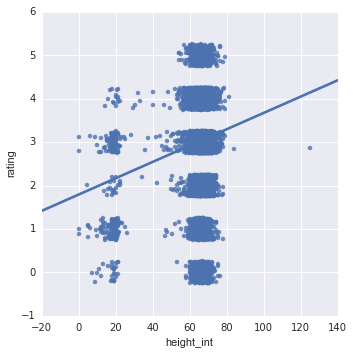

In [868]:
lm = sns.lmplot(x='height_int', y='rating', data=namus, ci=None, x_jitter=0.25, y_jitter=0.25)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f9e2550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x111f22668>]], dtype=object)

/Users/jenniferstark/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


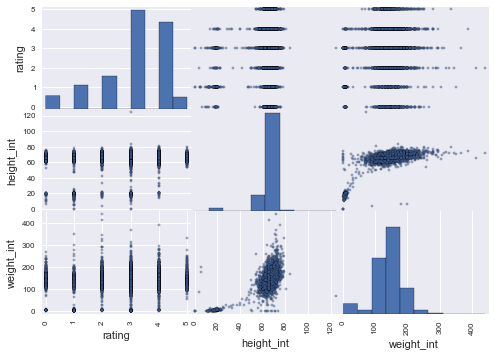

In [66]:
pd.scatter_matrix(namus[['rating', 'height_int', 'weight_int']])

/Users/jenniferstark/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


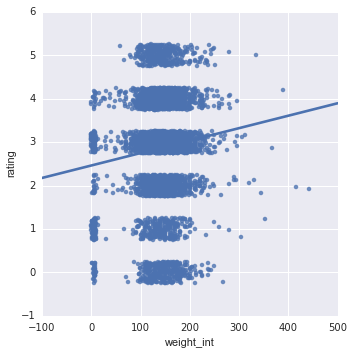

In [77]:
lm = sns.lmplot(x='weight_int', y='rating', data=namus, ci=None, x_jitter=0.25, y_jitter=0.25)

In [68]:
print(namus[namus.height_int == 125].height)
print(namus[namus.height_int == 125].sex)
print(namus[namus.height_int == 125].weight)

7352    125,\n\t\t\t\t\tMeasured
Name: height, dtype: object
7352    Male
Name: sex, dtype: object
7352    70,\n\t\t\t\t\tMeasured
Name: weight, dtype: object


* **It is possible that being able to measure the height leads to more variability in the IP range...? Odd. **

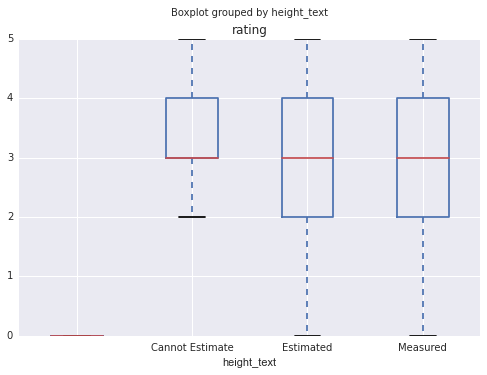

In [69]:
namus.boxplot(column='rating', by='height_text')

* **Weight as `'weight_text'` appears to have no bearing on IP??**

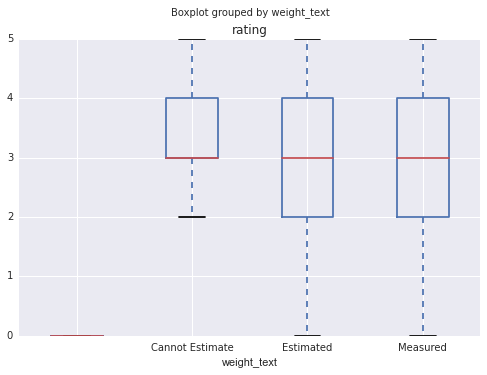

In [70]:
namus.boxplot(column='rating', by='weight_text')

**Before I go ahead and `'dropna()'`, I should see how many observations I will actually lose:**

In [89]:
print(namus[namus.rating == 5].weight_int.isnull().sum())
print(namus.height_int.isnull().sum())
print(namus.age_range.isnull().sum())

98
2224
670


In [130]:
namus.weight_text.unique()

array(['Cannot Estimate', 'Estimated', 'Measured', ''], dtype=object)

In [127]:
values = []
for c in namus.weight_text:
    if c == 'Cannot Estimate' or '':
        values.append(0)
    else: values.append(1)

In [128]:
namus['weight_bin'] = values

In [129]:
namus.weight_bin.head()

0    0
1    1
2    1
3    1
4    0
Name: weight_bin, dtype: int64

In [869]:
namus.height_bin.head(20)

0     0
1     1
2     1
3     1
4     0
5     1
6     1
7     0
8     1
9     1
10    0
11    1
12    0
13    0
14    1
15    0
16    1
17    1
18    1
19    1
Name: height_bin, dtype: int64

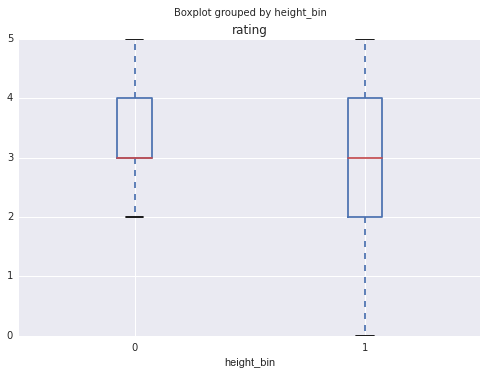

In [871]:
namus.boxplot(column='rating', by='height_bin')

/Users/jenniferstark/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


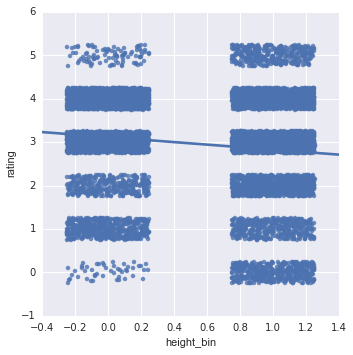

In [873]:
lm = sns.lmplot(x='height_bin', y='rating', data=namus, ci=None, x_jitter=0.25, y_jitter=0.25)

**Is it better to make `'height_int'` and `'weight_int'` a binary instead, with `'0'` for no data (i.e. `'nan'`) and 1 for `'has data'`...**

In [299]:
namus.sex.unique()

array(['Male', 'Female', 'Unsure', ''], dtype=object)

In [300]:
namus['_sex'] = namus.sex.map({'Male':1, 'Female':1, 'Unsure': 0, '':0})

In [301]:
namus._sex.unique()

array([1, 0])

#Modelling attempt 1: Linear Regression with All Features (sans text)

In [704]:
#  Create features for linear regression: all features consisting of an integer. All binary except `images` and 'age_range'
linreg_features = ['all_parts_recovered',
                  'amputations',
                  'artificial_parts_aids',
                  'deformities',
                  'finger_toe_nails',
                  'foreign_objects',
                  'head_not_recovered',
                   'images',
                  'medical_implants',
                  'n-hands_not_recovered',
                  'n-limbs_not_recovered',
                  'organ_absent',
                  'other_distinctive_features',
                  'other_medical_information',
                  'piercings',
                  'prior_surgery',
                  'scars_and_marks',
                  'skeletal_findings',
                  'tattoos',
                  'torso_not_recovered',
                  '_sex',
                  '_dna',
                  '_dental',
                  '_fingerprints',
                  '_face',
                  'l_eye',
                  'r_eye',
                  'height_bin',
                  'weight_bin',
                  'age_range']

In [709]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split

linreg = LinearRegression(normalize=True)

def train_test_rmse(linreg_features):
    X = namus[linreg_features]
    y = namus.rating
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

*  **Using the simplest model where I have binary features directly from the HTML plus count of images and age_range, plus recoded features into binary (presense vs absence of something) we get an RSME of 0.8159**

In [710]:
train_test_rmse(linreg_features)

0.81598268740570856

In [559]:
linreg.coef_

array([  9.24171823e-02,  -2.10115527e-03,  -1.23029660e-02,
         9.44218985e-03,   1.82031704e-01,   3.63668501e-02,
         1.48229711e-01,   5.43581357e-02,  -1.04673317e-02,
         1.33166645e-01,   4.75835788e-02,  -8.93699099e-02,
         8.42098942e-02,   6.64666260e-02,   1.58996097e-01,
         1.19608785e-01,   2.95736462e-02,   1.25626047e-01,
        -4.04932981e-02,  -2.93658005e-03,   3.69871875e-01,
         1.13677742e+00,   9.76499374e-01,   4.52601466e-01,
         2.68129893e-01,  -2.89428513e-01,   3.10198028e-02,
         6.46740790e+12,  -6.46740790e+12,  -2.05037744e-03])

###Try linreg model with Regularization. There may be colinear features, or very unimportant ones.

In [560]:
# alpha=0 is equivalent to linear regression
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0.05, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.816362038081


In [561]:
print(ridgereg.coef_)

[ 0.07669802  0.01428187 -0.00808291 -0.0192665   0.17212395  0.02632857
  0.11949315  0.05813029 -0.00444624  0.11803105  0.04848177 -0.08382805
  0.08507096  0.06143107  0.16171472  0.12653608  0.03251249  0.13155153
 -0.03972671  0.00804411  0.3622098   1.08564404  0.93622005  0.43461206
  0.2435833  -0.1357567  -0.09811317 -0.08429244 -0.08429244 -0.00209859]


In [711]:
# create an array of alpha values
alpha_range = 10.**np.arange(-10, 30)
alpha_range

array([  1.00000000e-10,   1.00000000e-09,   1.00000000e-08,
         1.00000000e-07,   1.00000000e-06,   1.00000000e-05,
         1.00000000e-04,   1.00000000e-03,   1.00000000e-02,
         1.00000000e-01,   1.00000000e+00,   1.00000000e+01,
         1.00000000e+02,   1.00000000e+03,   1.00000000e+04,
         1.00000000e+05,   1.00000000e+06,   1.00000000e+07,
         1.00000000e+08,   1.00000000e+09,   1.00000000e+10,
         1.00000000e+11,   1.00000000e+12,   1.00000000e+13,
         1.00000000e+14,   1.00000000e+15,   1.00000000e+16,
         1.00000000e+17,   1.00000000e+18,   1.00000000e+19,
         1.00000000e+20,   1.00000000e+21,   1.00000000e+22,
         1.00000000e+23,   1.00000000e+24,   1.00000000e+25,
         1.00000000e+26,   1.00000000e+27,   1.00000000e+28,
         1.00000000e+29])

In [712]:
# select the best alpha with RidgeCV
from sklearn.linear_model import RidgeCV
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='mean_squared_error')
ridgeregcv.fit(X_train, y_train)
ridgeregcv.alpha_

0.01

In [713]:
# predict method uses the best alpha value
y_pred = ridgeregcv.predict(X_test)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.815875265158


In [717]:
# select the best alpha with LassoCV
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=1000, normalize=True, random_state=1)
lassoregcv.fit(X_train, y_train)
lassoregcv.alpha_

/Users/jenniferstark/anaconda/lib/python3.4/site-packages/sklearn/linear_model/base.py:424: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if precompute == 'auto':


5.2393974126641511e-05

In [718]:
# examine the coefficients
print (lassoregcv.coef_)

[  4.57655942e-02   0.00000000e+00   0.00000000e+00  -0.00000000e+00
   1.49881059e-01   0.00000000e+00   1.24157401e-01   5.59752545e-02
   0.00000000e+00   1.13473502e-01   2.89315400e-02  -3.27914367e-02
   7.09554389e-02   5.26042804e-02   1.34528864e-01   1.07766159e-01
   1.33427021e-02   1.20023334e-01  -2.20815733e-02   0.00000000e+00
   3.48340046e-01   1.13259388e+00   9.73186716e-01   4.40135066e-01
   2.41066517e-01  -2.25906349e-01  -0.00000000e+00  -1.46426780e-01
  -2.16643784e-16  -1.91207041e-03]


In [719]:
# predict method uses the best alpha value
y_pred = lassoregcv.predict(X_test)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.815490651009


In [720]:
pd.DataFrame({'feature':linreg_features, 'importance':lassoregcv.coef_}).sort_values(by='importance')

,feature,importance
25,l_eye,-2.259063e-01
27,height_bin,-1.464268e-01
11,organ_absent,-3.279144e-02
18,tattoos,-2.208157e-02
29,age_range,-1.912070e-03
28,weight_bin,-2.166438e-16
1,amputations,0.000000e+00
2,artificial_parts_aids,0.000000e+00
3,deformities,-0.000000e+00
5,foreign_objects,0.000000e+00


* **Next, testing the Null:**

In [568]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

# fill the array with the mean value of y_test
y_null.fill(y_test.mean())
y_null

array([ 2.96126092,  2.96126092,  2.96126092, ...,  2.96126092,
        2.96126092,  2.96126092])

* **We see that the Null RSME is higher then in my model, at 1.193, meaning that my simple model might be better than the Null. I need to test more models (including / excluding different features) and run more tests (eg k-fold and accuracy). **

In [569]:
# compute null RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_null))

1.1927825446899545

##Exploring a Regression Tree Model

In [261]:
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeRegressor, export_graphviz, DecisionTreeClassifier

In [888]:
#  Create features for linear regression: all features consisting of an integer. All binary except `images` and 'age_range'
treereg_features = ['all_parts_recovered',
                  #'amputations',
                  #'artificial_parts_aids',
                  #'deformities',
                  'finger_toe_nails',
                  #'foreign_objects',
                  'head_not_recovered',
                   'images',
                  #'medical_implants',
                  'n-hands_not_recovered',
                  'n-limbs_not_recovered',
                  'organ_absent',
                  'other_distinctive_features',
                  'other_medical_information',
                  'piercings',
                  'prior_surgery',
                  'scars_and_marks',
                  'skeletal_findings',
                  'tattoos',
                  #'torso_not_recovered',
                  '_sex',
                  '_dna',
                  '_dental',
                  '_fingerprints',
                  '_face',
                  'l_eye',
                  #'r_eye',
                  'height_bin',
                  'weight_bin',
                  'age_range']

In [889]:
X = namus[treereg_features]
y = namus.rating

In [760]:
# instantiate a DecisionTreeRegressor (with random_state=1)
treereg = DecisionTreeRegressor(random_state=1)
scores = cross_val_score(treereg, X, y, cv=10, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

0.96657330021230314

In [761]:
# list of values to try
max_depth_range = range(1, 10)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

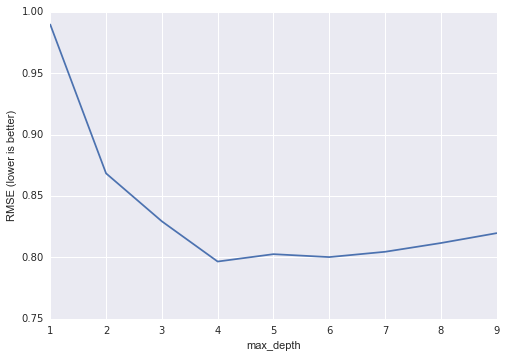

In [762]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [885]:
treereg = DecisionTreeRegressor(max_depth=4, random_state=1)
scores = cross_val_score(treereg, X, y, cv=100, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

0.81355872778042371

In [886]:
treereg.fit(X,y)
pd.DataFrame({'feature':treereg_features, 'importance':treereg.feature_importances_}).sort_values(by='importance')

,feature,importance
0,all_parts_recovered,0.000000
19,height_bin,0.000000
18,l_eye,0.000000
13,_sex,0.000000
12,tattoos,0.000000
11,skeletal_findings,0.000000
20,weight_bin,0.000000
9,prior_surgery,0.000000
10,scars_and_marks,0.000000
7,other_medical_information,0.000000


In [887]:
export_graphviz(treereg, out_file='treereg_featuresLassoCV_depth4_noImages.dot', feature_names=treereg_features)

* **Really great score - best yet at 0.7316. Can this be improved implementing a minimum leaf size?**

###Try different leaf sizes

In [767]:
treereg = DecisionTreeRegressor(min_samples_leaf=400, random_state=1)
scores = cross_val_score(treereg, X, y, cv=1000, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

0.77364038543680846

In [583]:
treereg.fit(X,y)
pd.DataFrame({'feature':linreg_features, 'importance':treereg.feature_importances_}).sort_values(by='importance')

,feature,importance
14,piercings,0.000000
26,r_eye,0.000000
20,_sex,0.000000
19,torso_not_recovered,0.000000
18,tattoos,0.000000
17,skeletal_findings,0.000000
16,scars_and_marks,0.000000
15,prior_surgery,0.000000
28,weight_bin,0.000000
13,other_medical_information,0.000000


In [584]:
export_graphviz(treereg, out_file='treereg_minleaf.dot', feature_names=linreg_features)

###TRY CLASSIFICATION TREE

In [815]:
treeclf = DecisionTreeClassifier(max_depth=4, random_state=1)
X = namus[treereg_features]
y = namus.rating
treeclf.fit(X, y)

scores = cross_val_score(treeclf, X, y, cv=100, scoring='accuracy')
np.mean(scores)


0.62789703845716749

In [816]:
pd.DataFrame({'feature':treereg_features, 'importance':treeclf.feature_importances_}).sort_values(by='importance')

,feature,importance
0,all_parts_recovered,0.000000
20,height_bin,0.000000
19,l_eye,0.000000
18,_face,0.000000
14,_sex,0.000000
12,skeletal_findings,0.000000
10,prior_surgery,0.000000
9,piercings,0.000000
11,scars_and_marks,0.000000
7,other_distinctive_features,0.000000


In [793]:
export_graphviz(treeclf, out_file='treeclf_depth7.dot', feature_names=treereg_features)

In [894]:
# list of values to try
max_depth_range = range(1, 10)

# list to store the average RMSE for each value of max_depth
accuracy_scores = []

# use with each value of max_depth
for depth in max_depth_range:
    treeclf2 = DecisionTreeClassifier(max_depth=depth, random_state=1)
    scores = cross_val_score(treeclf2, X, y, cv=10, scoring='accuracy')
    accuracy_scores.append(np.mean(scores))

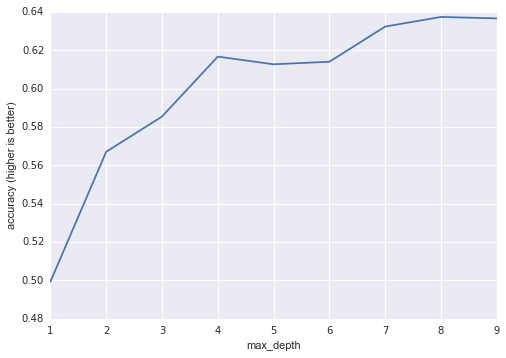

In [895]:
# plot max_depth (x-axis) versus accuracy (y-axis)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('accuracy (higher is better)')

In [900]:
treeclf = DecisionTreeClassifier(max_depth=4, random_state=1)
treeclf.fit(X, y)

scores = cross_val_score(treeclf, X, y, cv=100, scoring='accuracy')
np.mean(scores)

0.62789703845716749

In [898]:
pd.DataFrame({'feature':treereg_features, 'importance':treeclf.feature_importances_}).sort_values(by='importance')

,feature,importance
0,all_parts_recovered,0.000000
20,height_bin,0.000000
19,l_eye,0.000000
18,_face,0.000000
14,_sex,0.000000
12,skeletal_findings,0.000000
10,prior_surgery,0.000000
9,piercings,0.000000
11,scars_and_marks,0.000000
7,other_distinctive_features,0.000000


In [901]:
export_graphviz(treeclf, out_file='treeclf_depth4.dot', feature_names=treereg_features)

**Clf tree *might* be better than treereg, in that it did predict some `'5'` in there, whereas treereg predicted no `'5'`'s at all**

##Regression Random Forests...

In [592]:
#  Create features for linear regression: all features consisting of an integer. All binary except `images`
rfreg_features = ['all_parts_recovered',
                  'amputations',
                  'artificial_parts_aids',
                  'deformities',
                  'finger_toe_nails',
                  'foreign_objects',
                  'head_not_recovered',
                   'images',
                  'medical_implants',
                  'n-hands_not_recovered',
                  'n-limbs_not_recovered',
                  'organ_absent',
                  'other_distinctive_features',
                  'other_medical_information',
                  'piercings',
                  'prior_surgery',
                  'scars_and_marks',
                  'skeletal_findings',
                  'tattoos',
                  'torso_not_recovered',
                  '_sex',
                  '_dna',
                  '_dental',
                  '_fingerprints',
                  '_face',
                  'l_eye',
                  'r_eye',
                  'height_bin',
                  'weight_bin',
                  'age_range']

In [593]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor()
rfreg
X = namus[rfreg_features]
y = namus.rating

In [903]:
# list of values to try for n_estimators
estimator_range = range(10, 310, 10)

# list to store the average RMSE for each value of n_estimators
RMSE_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

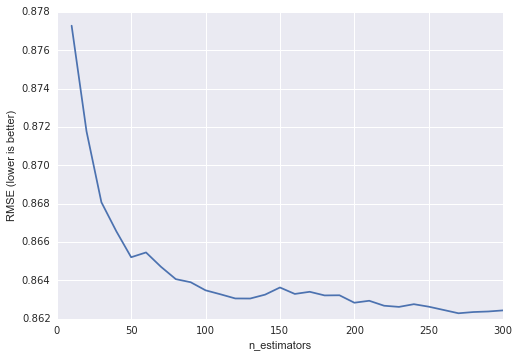

In [904]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE (lower is better)')

In [905]:
sorted(zip(RMSE_scores, estimator_range))[0]

(0.86228584834914257, 270)

**Tuning max features per split**

In [597]:
# list of values to try for max_features
feature_range = range(1, len(rfreg_features)+1)

# list to store the average RMSE for each value of max_features
RMSE_scores = []

# use 10-fold cross-validation with each value of max_features (WARNING: SLOW!)
for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=270, max_features=feature, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=10, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

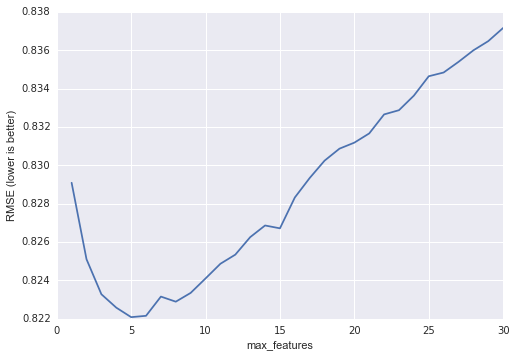

In [598]:
# plot max_features (x-axis) versus RMSE (y-axis)
plt.plot(feature_range, RMSE_scores)
plt.xlabel('max_features')
plt.ylabel('RMSE (lower is better)')

In [599]:
# show the best RMSE and the corresponding max_features
sorted(zip(RMSE_scores, feature_range))[0]

(0.82208363286000685, 5)

In [600]:
# max_features=8 is best and n_estimators=150 is sufficiently large
rfreg = RandomForestRegressor(n_estimators=270, max_features=5, oob_score=True, random_state=1)
rfreg.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=5, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=270, n_jobs=1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [601]:
# compute feature importances
pd.DataFrame({'feature':rfreg_features, 'importance':rfreg.feature_importances_}).sort('importance')

/Users/jenniferstark/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from IPython.kernel.zmq import kernelapp as app


,feature,importance
2,artificial_parts_aids,0.001533
1,amputations,0.001645
5,foreign_objects,0.001812
11,organ_absent,0.002568
3,deformities,0.002812
8,medical_implants,0.003167
14,piercings,0.003208
4,finger_toe_nails,0.003728
15,prior_surgery,0.004919
19,torso_not_recovered,0.006218


In [602]:
# compute the out-of-bag R-squared score
rfreg.oob_score_

0.56262711423348488

In [603]:
# check the shape of X
X.shape

(10529, 30)

In [604]:
# set a threshold for which features to include
print (rfreg.transform(X, threshold=0.1).shape)
print (rfreg.transform(X, threshold='mean').shape)
print (rfreg.transform(X, threshold='median').shape)

(10529, 4)
(10529, 5)
(10529, 15)


In [605]:
# create a new feature matrix that only includes important features
X_important = rfreg.transform(X, threshold='mean')

In [606]:
# check the RMSE for a Random Forest that only includes important features
rfreg = RandomForestRegressor(n_estimators=130, max_features=3, random_state=1)
scores = cross_val_score(rfreg, X_important, y, cv=10, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

0.8228063181519355

In [406]:
#USE BEST TREEREG MODEL FOR RANDOM FOREST: Is it better than throwing in everything?
rfreg_features2 = ['_face',
                  'deformities',
                  'finger_toe_nails',
                  'head_not_recovered',
                  'images',
                  'medical_implants',
                  'n-hands_not_recovered',
                  'n-limbs_not_recovered',
                  'other_distinctive_features',
                  'skeletal_findings',
                  '_fingerprints',
                  '_dna',
                  '_dental',
                    'l_eye',
                   'r_eye']

In [407]:
rfreg = RandomForestRegressor()
rfreg
X = namus[rfreg_features2]
y = namus.rating

In [408]:
# list of values to try for n_estimators
estimator_range = range(10, 310, 10)

# list to store the average RMSE for each value of n_estimators
RMSE_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

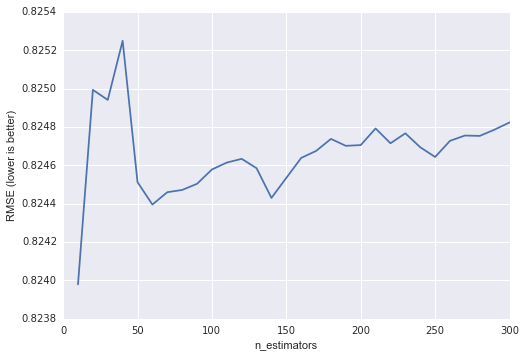

In [409]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE (lower is better)')

In [410]:
sorted(zip(RMSE_scores, estimator_range))[0]

(0.82397944187571803, 10)

In [414]:
# list of values to try for max_features
feature_range = range(1, len(rfreg_features2)+1)

# list to store the average RMSE for each value of max_features
RMSE_scores = []

# use 10-fold cross-validation with each value of max_features (WARNING: SLOW!)
for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=10, max_features=feature, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=10, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

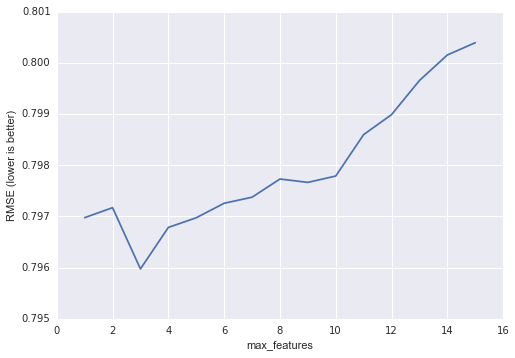

In [415]:
# plot max_features (x-axis) versus RMSE (y-axis)
plt.plot(feature_range, RMSE_scores)
plt.xlabel('max_features')
plt.ylabel('RMSE (lower is better)')

In [416]:
# show the best RMSE and the corresponding max_features
sorted(zip(RMSE_scores, feature_range))[0]

(0.79597421775799004, 3)

In [417]:
# max_features=8 is best and n_estimators=150 is sufficiently large
rfreg = RandomForestRegressor(n_estimators=10, max_features=3, oob_score=True, random_state=1)
rfreg.fit(X, y)

/Users/jenniferstark/anaconda/lib/python3.4/site-packages/sklearn/ensemble/forest.py:659: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [418]:
# compute feature importances
pd.DataFrame({'feature':rfreg_features2, 'importance':rfreg.feature_importances_}).sort('importance')

/Users/jenniferstark/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from IPython.kernel.zmq import kernelapp as app


,feature,importance
1,deformities,0.003909
2,finger_toe_nails,0.004840
5,medical_implants,0.005371
3,head_not_recovered,0.009274
6,n-hands_not_recovered,0.009279
8,other_distinctive_features,0.009460
7,n-limbs_not_recovered,0.010198
9,skeletal_findings,0.014590
14,r_eye,0.015492
13,l_eye,0.017093


In [419]:
# compute the out-of-bag R-squared score
rfreg.oob_score_

0.51166601163422465

In [420]:
# check the shape of X
X.shape

(10529, 15)

In [421]:
# set a threshold for which features to include
print (rfreg.transform(X, threshold=0.1).shape)
print (rfreg.transform(X, threshold='mean').shape)
print (rfreg.transform(X, threshold='median').shape)

(10529, 3)
(10529, 3)
(10529, 8)


In [422]:
# create a new feature matrix that only includes important features
X_important = rfreg.transform(X, threshold='mean')

In [423]:
# check the RMSE for a Random Forest that only includes important features
rfreg = RandomForestRegressor(n_estimators=10, max_features=3, random_state=1)
scores = cross_val_score(rfreg, X_important, y, cv=10, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

0.8158311414780387

### Full Random Forest Model appears to be better.

##Classification Random Forest...

In [661]:
rfclf_features = ['_dna',
                 '_dental',
                 'images',
                 '_fingerprints',
                 'weight_bin',
                 'height_bin',
                 'age_range',
                 'tattoos',
                 '_face']

In [907]:
from sklearn.ensemble import RandomForestClassifier

X = namus[linreg_features]
y = namus.rating

In [912]:
# list of values to try for n_estimators
estimator_range = range(10, 310, 10)

# list to store the average RMSE for each value of n_estimators
accuracy_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    rfclf = RandomForestClassifier(n_estimators=estimator, random_state=1)
    accuracy_score = cross_val_score(rfclf, X, y, cv=5, scoring='accuracy')
    accuracy_scores.append(accuracy_score)

In [913]:
avg = np.mean(accuracy_scores)
print(avg)

0.596806089135


output 0.62% for rfclf_features

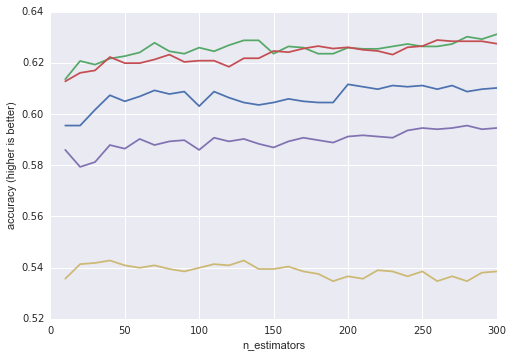

In [918]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.plot(estimator_range, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy (higher is better)')

In [917]:
sorted(zip(accuracy_scores, estimator_range))[0]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [924]:
# list of values to try for max_features
feature_range = range(1, len(rfreg_features)+1)

# list to store the average RMSE for each value of max_features
accuracy_scores = []

# use 10-fold cross-validation with each value of max_features (WARNING: SLOW!)
for feature in feature_range:
    rfclf = RandomForestClassifier(n_estimators=65, max_features=feature, random_state=1)
    accuracy_score = cross_val_score(rfclf, X, y, cv=10, scoring='accuracy')
    accuracy_scores.append(accuracy_score)

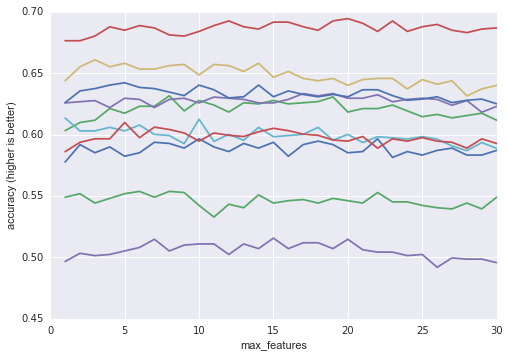

In [925]:
# plot max_features (x-axis) versus RMSE (y-axis)
plt.plot(feature_range, accuracy_scores)
plt.xlabel('max_features')
plt.ylabel('accuracy (higher is better)')

In [631]:
# show the best RMSE and the corresponding max_features
sorted(zip(accuracy_scores, feature_range))[0]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [932]:
from sklearn.cross_validation import cross_val_predict

rfclf_test = RandomForestClassifier(n_estimators=65, max_features=10, random_state=1, oob_score=True)
rfclf_test.fit(X, y)
scores = cross_val_score(rfclf, X, y, cv=10, scoring='accuracy')
predicted = cross_val_predict(rfclf, X, y, cv=10)
print(metrics.accuracy_score(y, predicted))
print(np.mean(scores))

0.600056985469
0.600022955


In [933]:
rfclf_test.oob_score_

0.64593028777661698

In [865]:
y_pred = rfclf_test.predict_proba(X)
print (metrics.roc_auc_score(y, y_pred))

ValueError: multiclass format is not supported

In [934]:
pd.DataFrame({'feature':linreg_features, 'importance':rfclf_test.feature_importances_}).sort_values(by='importance')

,feature,importance
2,artificial_parts_aids,0.002396
5,foreign_objects,0.002718
1,amputations,0.003162
11,organ_absent,0.005064
3,deformities,0.005102
4,finger_toe_nails,0.005610
14,piercings,0.007157
8,medical_implants,0.007187
15,prior_surgery,0.010281
27,height_bin,0.011225


In [621]:
namus.rating.value_counts()

3    3870
4    3396
2    1312
1     962
0     526
5     463
Name: rating, dtype: int64

In [640]:
namus.case_status.unique()

array(['Unidentified', 'Unidentified Living'], dtype=object)

**Consider SVC (support vector classification: one vs all)**

In [466]:
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import LinearSVC, SVC

In [439]:
X = namus[treereg_features]
y = namus.rating
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [441]:
svc = OneVsRestClassifier(LinearSVC())
svc.fit(X, y)
scores = cross_val_score(svc, X, y, cv=50, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

1.0697536796753326

In [442]:
svc.score(X_test, y_test)

0.57804785415875426

In [443]:
svc = OneVsRestClassifier(LinearSVC(class_weight='auto'))
svc.fit(X, y)
scores = cross_val_score(svc, X, y, cv=50, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

1.1848621625106528

In [444]:
svc.score(X_test, y_test)

0.54348651728066844

In [447]:
svc = OneVsRestClassifier(SVC(class_weight='auto'))
svc.fit(X, y)
scores = cross_val_score(svc, X, y, cv=50, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

1.0928645789813842

In [448]:
svc.score(X_test, y_test)

0.59437903532092673

In [449]:
X = namus[treereg_features4]
y = namus.rating
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [450]:
svc = OneVsRestClassifier(SVC(class_weight='auto'))
svc.fit(X, y)
scores = cross_val_score(svc, X, y, cv=50, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

0.96658419265758977

In [451]:
svc.score(X_test, y_test)

0.59513862514242311

In [460]:
svc = OneVsRestClassifier(SVC(class_weight='auto'))
svc.fit(X, y)
scores = cross_val_score(svc, X, y, cv=10, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

0.99717067078322574

In [461]:
svc.score(X_test, y_test)

0.59513862514242311

In [462]:
svc = OneVsRestClassifier(SVC())
svc.fit(X, y)
scores = cross_val_score(svc, X, y, cv=10, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

0.94391129347758729

In [463]:
svc.score(X_test, y_test)

0.6372958602354728

In [464]:
svc = OneVsRestClassifier(SVC())
svc.fit(X, y)
scores = cross_val_score(svc, X, y, cv=20, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

0.92127596191139316

In [465]:
svc.score(X_test, y_test)

0.6372958602354728

In [468]:
svc = OneVsRestClassifier(SVC())
svc.fit(X, y)
scores = cross_val_score(svc, X, y, cv=25, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

0.92298189439098399

In [469]:
svc.score(X_test, y_test)

0.6372958602354728

**Use SVR, Use Bagging, ... Mess with tuning params? which ones?**

In [471]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# standardize X
scaler.fit(X)
X_scaled = scaler.transform(X)

In [472]:
svc_scaled = OneVsRestClassifier(SVC())
svc_scaled.fit(X_scaled, y)
scores = cross_val_score(svc, X_scaled, y, cv=25, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

0.92222182001541919

In [474]:
svc.score(X_test_scaled, y_test)

0.48157994682871247

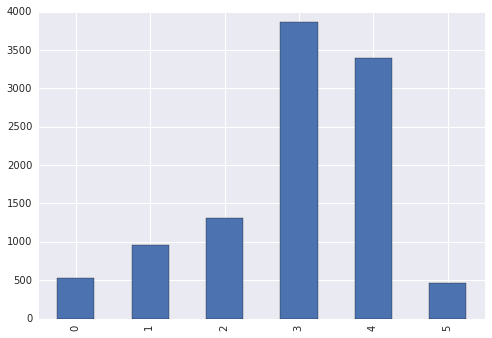

In [862]:
stars = [0,1,2,3,4,5]
namus.rating.value_counts().ix[list(stars)].plot(kind='bar')

In [ ]:
df.ix[list('CADFEB')].plot(kind='barh')

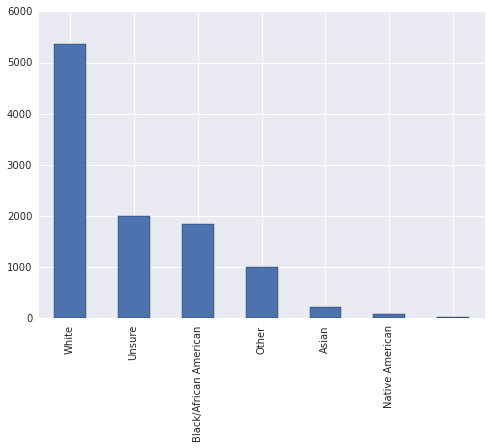

In [841]:
namus.race.value_counts().plot(kind='bar')

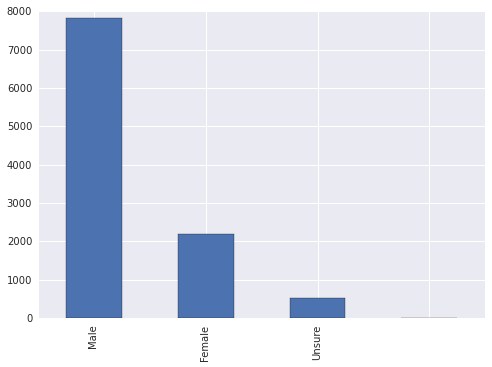

In [842]:
namus.sex.value_counts().plot(kind='bar')

In [935]:
namus._min_age.dtype

dtype('float64')

In [936]:
namus.fingerprints.unique()

array(['Fingerprint information is currently not available',
       'Fingerprint information is available and entered',
       'Fingerprint information is available elsewhere',
       'No fingerprint information is currently available'], dtype=object)